<a href="https://colab.research.google.com/github/WilderGitHub/datascience/blob/main/fusionar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m spacy download es

In [ ]:
import pandas as pd
import spacy

# Load the Spanish language model
nlp = spacy.load("es_core_news_sm")

# Example DataFrame
data = {
    "texto": [
        "Este es un ejemplo de texto en español.",
        "El análisis de lenguaje natural es interesante.",
    ]
}

df = pd.DataFrame(data)

# Function to apply NLP analysis to each row in the "texto" column
def analyze_text(text):
    doc = nlp(text)
    # You can perform various NLP tasks on the "doc" object, such as tokenization, named entity recognition, part-of-speech tagging, etc.
    # Here's an example that prints tokenized words for each text.
    tokenized_words = [token.text for token in doc]
    return tokenized_words

# Apply the analyze_text function to each row in the DataFrame
df["nlp_analysis"] = df["texto"].apply(analyze_text)

# Display the DataFrame with NLP analysis results
print(df)

                                             texto  \
0          Este es un ejemplo de texto en español.   
1  El análisis de lenguaje natural es interesante.   

                                        nlp_analysis  
0  [Este, es, un, ejemplo, de, texto, en, español...  
1  [El, análisis, de, lenguaje, natural, es, inte...  


In [ ]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.corpora import Dictionary

# Conjunto de documentos de ejemplo
documents = [
    "El análisis de lenguaje natural es una rama emocionante de la inteligencia artificial.",
    "Los modelos de lenguaje son fundamentales para el procesamiento de texto.",
    "La detección de temas en documentos es una aplicación común de LDA.",
    "La inteligencia artificial y el aprendizaje automático están revolucionando la tecnología.",
    "El procesamiento de lenguaje natural implica analizar y comprender el texto en lenguaje humano."
]

# Tokenización y creación de un diccionario
tokenized_documents = [document.lower().split() for document in documents]
dictionary = corpora.Dictionary(tokenized_documents)

# Creación de un corpus (representación vectorial de los documentos)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

# Entrenamiento del modelo LDA
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

# Mostrar los tópicos descubiertos
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.027*"artificial" + 0.027*"están" + 0.026*"revolucionando" + 0.026*"automático" + 0.026*"aprendizaje"')
(1, '0.094*"de" + 0.069*"el" + 0.056*"lenguaje" + 0.056*"la" + 0.031*"natural"')


In [ ]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Descargar recursos de NLTK (stop words y lemmatizador)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Cargar stop words y crear un lemmatizador
stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()

# Definir una lista de documentos de ejemplo
documents = [
    "El análisis de lenguaje natural es una rama emocionante de la inteligencia artificial.",
    "Los modelos de lenguaje son fundamentales para el procesamiento de texto.",
    "La detección de temas en documentos es una aplicación común de LDA.",
    "La inteligencia artificial y el aprendizaje automático están revolucionando la tecnología.",
    "El procesamiento de lenguaje natural implica analizar y comprender el texto en lenguaje humano."
]

# Tokenización, eliminación de stopwords y lematización de los documentos
def preprocess(doc):
    tokens = word_tokenize(doc)
    tokens = [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Aplicar preprocesamiento a los documentos
preprocessed_documents = [preprocess(doc) for doc in documents]

# Crear un diccionario y un corpus
dictionary = corpora.Dictionary(preprocessed_documents)
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_documents]

# Entrenar el modelo LDA
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

# Imprimir los tópicos identificados
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic}\n")

# Asignar tópicos a los documentos
for i, doc in enumerate(documents):
    topic = lda_model.get_document_topics(corpus[i])
    print(f"Document {i}: {doc}\nTopic Distribution: {topic}\n")


Topic 0: 0.062*"artificial" + 0.062*"inteligencia" + 0.061*"común" + 0.061*"documentos" + 0.061*"detección" + 0.061*"LDA" + 0.061*"temas" + 0.061*"aplicación" + 0.061*"tecnología" + 0.061*"automático"

Topic 1: 0.134*"lenguaje" + 0.075*"procesamiento" + 0.075*"texto" + 0.075*"natural" + 0.045*"implica" + 0.045*"humano" + 0.045*"comprender" + 0.045*"fundamentales" + 0.045*"modelos" + 0.045*"analizar"

Document 0: El análisis de lenguaje natural es una rama emocionante de la inteligencia artificial.
Topic Distribution: [(0, 0.07648904), (1, 0.92351097)]

Document 1: Los modelos de lenguaje son fundamentales para el procesamiento de texto.
Topic Distribution: [(0, 0.08656872), (1, 0.9134313)]

Document 2: La detección de temas en documentos es una aplicación común de LDA.
Topic Distribution: [(0, 0.92639446), (1, 0.07360549)]

Document 3: La inteligencia artificial y el aprendizaje automático están revolucionando la tecnología.
Topic Distribution: [(0, 0.9209022), (1, 0.079097845)]

Docum

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


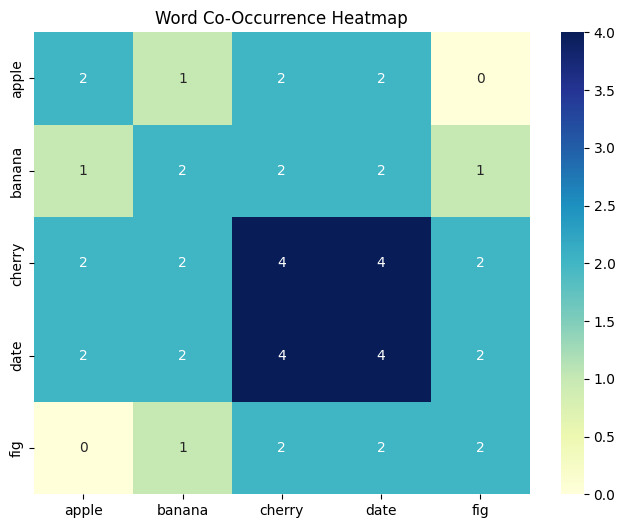

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Sample text data
data = [
    "apple banana cherry date",
    "banana cherry date fig",
    "apple cherry date",
    "cherry date fig",
]

# Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(data)

# Create a DataFrame from the document-term matrix
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

# Calculate the word co-occurrence matrix
word_co_occurrence = dtm_df.T.dot(dtm_df)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(word_co_occurrence, annot=True, cmap="YlGnBu", fmt="d", xticklabels=True, yticklabels=True)
plt.title("Word Co-Occurrence Heatmap")
plt.show()

In [ ]:
import pandas as pd

In [ ]:
archivo1="/content/infoElDebersinduplicados03nov1321.csv"  # El Deber
archivo2="/content/articulosLarazon01nov2117.csv"  # La Razón

#archivo="/content/drive/MyDrive/articuloseconomia.csv"
#archivo="/content/drive/MyDrive/articulos_consolidados_hasta_5377.csv"

df1= pd.read_csv(archivo1, sep = '|')
df2= pd.read_csv(archivo2, sep = '|')


In [ ]:
df2["periodico"]="LaRazon"
df1["periodico"]="ElDeber"

In [ ]:
df1.head(2)

,Unnamed: 0.1,Unnamed: 0,link,fecha,titular,subtitular,textor,periodico
0,0,0,https://eldeber.com.bo/economia/la-economia-bo...,2020-04-14 00:00:00,"La economía boliviana se contraerá un 2,9% en ...",El FMI señala que los países exportadores de m...,El Fondo Monetario Internacional (FMI) prevé q...,ElDeber
1,1,1,https://eldeber.com.bo/economia/constructores-...,2020-04-14 00:00:00,Constructores llaman a suscribir un acuerdo y ...,Se trata de los actores del sector de la const...,"Con la propuesta sobre la mesa. ""El Gobierno n...",ElDeber


In [ ]:
df1 = df1.rename(columns={'textor': 'texto'})

In [ ]:
df1.head(2)

,Unnamed: 0.1,Unnamed: 0,link,fecha,titular,subtitular,texto,periodico
0,0,0,https://eldeber.com.bo/economia/la-economia-bo...,2020-04-14 00:00:00,"La economía boliviana se contraerá un 2,9% en ...",El FMI señala que los países exportadores de m...,El Fondo Monetario Internacional (FMI) prevé q...,ElDeber
1,1,1,https://eldeber.com.bo/economia/constructores-...,2020-04-14 00:00:00,Constructores llaman a suscribir un acuerdo y ...,Se trata de los actores del sector de la const...,"Con la propuesta sobre la mesa. ""El Gobierno n...",ElDeber


In [ ]:
df2 = df2[['link','fecha','titular','subtitular','texto','periodico']]
df2.head()

,link,fecha,titular,subtitular,texto,periodico
0,https://www.la-razon.com/economia/2011/04/14/e...,2011-04-14,El 50% de la quinua sale de contrabando,Denuncia. El comercio ilícito del grano aument...,El viceministro de Comercio Interno y Exportac...,LaRazon
1,https://www.la-razon.com/economia/2011/04/14/u...,2011-04-14,Unión Europea rubrica con Colombia y Perú su TLC,Los europeos esperan que Bolivia y Ecuador se ...,"La UE, Colombia y Perú rubricaron ayer durante...",LaRazon
2,https://www.la-razon.com/economia/2011/04/14/h...,2011-04-14,Habrá descuentos por días no trabajados,Aguilar recordó que en marzo algunos maestros ...,El Gobierno determinó descontar de sus salario...,LaRazon
3,https://www.la-razon.com/economia/2011/04/14/s...,2011-04-14,Sectores sociales bloquean diversas calles y z...,El paso vehicular en varias puntos de acceso e...,La sede de Gobierno amaneció bloqueada en dive...,LaRazon
4,https://www.la-razon.com/economia/2011/04/14/l...,2011-04-14,LA TENSIÓN SE ELEVA POR LAS AMENAZAS DE LOS SE...,Respuesta. Campesinos y cocaleros anuncian mov...,Como ocurre desde el miércoles de la anterior ...,LaRazon


In [ ]:
df1 = df1[['link','fecha','titular','subtitular','texto','periodico']]
df1.head()

,link,fecha,titular,subtitular,texto,periodico
0,https://eldeber.com.bo/economia/la-economia-bo...,2020-04-14 00:00:00,"La economía boliviana se contraerá un 2,9% en ...",El FMI señala que los países exportadores de m...,El Fondo Monetario Internacional (FMI) prevé q...,ElDeber
1,https://eldeber.com.bo/economia/constructores-...,2020-04-14 00:00:00,Constructores llaman a suscribir un acuerdo y ...,Se trata de los actores del sector de la const...,"Con la propuesta sobre la mesa. ""El Gobierno n...",ElDeber
2,https://eldeber.com.bo/economia/compania-ofrec...,2020-04-13 00:00:00,Compañía ofrece a Bolivia tela para fabricar t...,"El material dura hasta ocho meses, retiene el ...",La propagación del coronavirus en Bolivia y el...,ElDeber
3,https://eldeber.com.bo/economia/vias-entre-coc...,2020-04-13 00:00:00,"Vías entre Cochabamba, Santa Cruz, Chuquisaca ...",La Administradora Boliviana de Carreteras gara...,El gerente regional de la Administradora Boliv...,ElDeber
4,https://eldeber.com.bo/economia/banco-mundial-...,2020-04-13 00:00:00,"Banco Mundial prevé caída del PIB al -3,4% y l...",El organismo internacional revela el impacto d...,El Banco Mundial (BM) prevé un decrecimiento d...,ElDeber


In [ ]:
articulos = pd.concat([df1, df2], axis=0)
articulos = articulos.reset_index(drop=True)
articulos

,link,fecha,titular,subtitular,texto,periodico
0,https://eldeber.com.bo/economia/la-economia-bo...,2020-04-14 00:00:00,"La economía boliviana se contraerá un 2,9% en ...",El FMI señala que los países exportadores de m...,El Fondo Monetario Internacional (FMI) prevé q...,ElDeber
1,https://eldeber.com.bo/economia/constructores-...,2020-04-14 00:00:00,Constructores llaman a suscribir un acuerdo y ...,Se trata de los actores del sector de la const...,"Con la propuesta sobre la mesa. ""El Gobierno n...",ElDeber
2,https://eldeber.com.bo/economia/compania-ofrec...,2020-04-13 00:00:00,Compañía ofrece a Bolivia tela para fabricar t...,"El material dura hasta ocho meses, retiene el ...",La propagación del coronavirus en Bolivia y el...,ElDeber
3,https://eldeber.com.bo/economia/vias-entre-coc...,2020-04-13 00:00:00,"Vías entre Cochabamba, Santa Cruz, Chuquisaca ...",La Administradora Boliviana de Carreteras gara...,El gerente regional de la Administradora Boliv...,ElDeber
4,https://eldeber.com.bo/economia/banco-mundial-...,2020-04-13 00:00:00,"Banco Mundial prevé caída del PIB al -3,4% y l...",El organismo internacional revela el impacto d...,El Banco Mundial (BM) prevé un decrecimiento d...,ElDeber
...,...,...,...,...,...,...
48173,https://www.la-razon.com/economia/2017/08/18/m...,2017-08-18,Morales inaugura construcción de primer tren e...,"Según datos oficiales, el tren metropolitano p...",El presidente Evo Morales inauguró la noche de...,LaRazon
48174,https://www.la-razon.com/economia/2017/08/17/c...,2017-08-17,Comisión legislativa analiza incremento del Pr...,El proyecto de ley otorgar además un crédito e...,"La Comisión de Planificación, Política Económi...",LaRazon
48175,https://www.la-razon.com/economia/2017/08/17/c...,2017-08-17,Comisión legislativa analiza incremento del Pr...,El proyecto de ley otorgar además un crédito e...,"La Comisión de Planificación, Política Económi...",LaRazon
48176,https://www.la-razon.com/economia/2017/08/17/b...,2017-08-17,Bolivia acelera trámites y en diciembre pasa a...,El canciller Fernando Huanacuni explicó que ah...,Bolivia tiene un plazo de dos años para concre...,LaRazon


In [ ]:
articulos.shape

(44927, 6)

In [ ]:
articulos = articulos.drop_duplicates(subset='link')
articulos.shape

(45093, 6)

In [ ]:
# Verificamos si existe informacion faltante
articulos["link"].isnull().sum()

0

In [ ]:
articulos["texto"].isnull().sum()

166

In [ ]:
articulos = articulos.dropna(subset=['texto'])

In [ ]:
articulos["texto"].isnull().sum()

0

In [ ]:
articulos = articulos.drop_duplicates(subset='link')


In [ ]:
articulos["link"].isnull().sum()

0

In [ ]:
articulos.head()

,link,fecha,titular,subtitular,texto,periodico
0,https://eldeber.com.bo/economia/la-economia-bo...,2020-04-14 00:00:00,"La economía boliviana se contraerá un 2,9% en ...",El FMI señala que los países exportadores de m...,El Fondo Monetario Internacional (FMI) prevé q...,ElDeber
1,https://eldeber.com.bo/economia/constructores-...,2020-04-14 00:00:00,Constructores llaman a suscribir un acuerdo y ...,Se trata de los actores del sector de la const...,"Con la propuesta sobre la mesa. ""El Gobierno n...",ElDeber
2,https://eldeber.com.bo/economia/compania-ofrec...,2020-04-13 00:00:00,Compañía ofrece a Bolivia tela para fabricar t...,"El material dura hasta ocho meses, retiene el ...",La propagación del coronavirus en Bolivia y el...,ElDeber
3,https://eldeber.com.bo/economia/vias-entre-coc...,2020-04-13 00:00:00,"Vías entre Cochabamba, Santa Cruz, Chuquisaca ...",La Administradora Boliviana de Carreteras gara...,El gerente regional de la Administradora Boliv...,ElDeber
4,https://eldeber.com.bo/economia/banco-mundial-...,2020-04-13 00:00:00,"Banco Mundial prevé caída del PIB al -3,4% y l...",El organismo internacional revela el impacto d...,El Banco Mundial (BM) prevé un decrecimiento d...,ElDeber


In [ ]:
articulos.to_csv('02articulosbruto03nov1442.csv', sep='|', index=False)

In [ ]:
articulos

,link,fecha,titular,subtitular,texto,periodico
0,https://eldeber.com.bo/economia/la-economia-bo...,2020-04-14 00:00:00,"La economía boliviana se contraerá un 2,9% en ...",El FMI señala que los países exportadores de m...,El Fondo Monetario Internacional (FMI) prevé q...,ElDeber
1,https://eldeber.com.bo/economia/constructores-...,2020-04-14 00:00:00,Constructores llaman a suscribir un acuerdo y ...,Se trata de los actores del sector de la const...,"Con la propuesta sobre la mesa. ""El Gobierno n...",ElDeber
2,https://eldeber.com.bo/economia/compania-ofrec...,2020-04-13 00:00:00,Compañía ofrece a Bolivia tela para fabricar t...,"El material dura hasta ocho meses, retiene el ...",La propagación del coronavirus en Bolivia y el...,ElDeber
3,https://eldeber.com.bo/economia/vias-entre-coc...,2020-04-13 00:00:00,"Vías entre Cochabamba, Santa Cruz, Chuquisaca ...",La Administradora Boliviana de Carreteras gara...,El gerente regional de la Administradora Boliv...,ElDeber
4,https://eldeber.com.bo/economia/banco-mundial-...,2020-04-13 00:00:00,"Banco Mundial prevé caída del PIB al -3,4% y l...",El organismo internacional revela el impacto d...,El Banco Mundial (BM) prevé un decrecimiento d...,ElDeber
...,...,...,...,...,...,...
48168,https://www.la-razon.com/economia/2017/08/20/e...,2017-08-20,El Gran Campeón de la XI ExpoFeria camélida de...,"El nuevo campeón tiene un peso de 167 kilos, p...",El Gran Campeón de la XI ExpoFeria Integral de...,LaRazon
48169,https://www.la-razon.com/economia/2017/08/20/i...,2017-08-20,INFOCAL Oruro presentó la parrillada de costil...,"Los cocineros, vestidos con ropa blanca y el g...",En la XI ExpoFeria Integral de Camélidos Oruro...,LaRazon
48170,https://www.la-razon.com/economia/2017/08/20/i...,2017-08-20,INFOCAL Oruro presentó la parrillada de costil...,"Los cocineros, vestidos con ropa blanca y el g...",En la XI ExpoFeria Integral de Camélidos Oruro...,LaRazon
48171,https://www.la-razon.com/economia/2017/08/19/m...,2017-08-19,Morales inaugura feria de camélidos en Turco,"La feria de camélidos concluirá mañana, acoge ...",El presidente Evo Morales inauguró la mañana d...,LaRazon
